<a href="https://colab.research.google.com/github/L16Aya/ap155_OUTPUTS/blob/main/FT_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from skimage import data, color

def simulate_4f(input_image, aperture_mask, title):

    output_img = fft.fft2(fft.fftshift(fft.fft2(input_image))*aperture_mask)

    fig, axs = plt.subplots(1, 4, figsize=(12, 3))

    axs[0].imshow(input_image, cmap="gray", origin="lower")
    axs[0].set_title("Original")

    axs[1].imshow(aperture_mask, cmap="gray", origin="lower")
    axs[1].set_title(title)

    axs[2].imshow(np.abs(output_img), cmap="gray", origin="lower")
    axs[2].set_title("Reconstructed Image")

    axs[3].imshow(np.log(1.0 + np.abs(output_img)), cmap="gray", origin="lower")
    axs[3].set_title("FT Log Amplitude")

    return fig, axs

# --- Circular / Pinhole ---
def circular_pinhole(input_image, radius):
    ny, nx = input_image.shape
    y, x = np.ogrid[-ny//2:ny//2, -nx//2:nx//2]
    aperture = (x**2 + y**2 <= radius**2).astype(float)
    return simulate_4f(input_image, aperture, title=f"Circular Pinhole r={radius}")

# --- Annular Aperture ---
def annular_aperture(input_image, inner_radius, width):
    ny, nx = input_image.shape
    y, x = np.ogrid[-ny//2:ny//2, -nx//2:nx//2]
    r = np.sqrt(x**2 + y**2)
    aperture = ((r >= inner_radius) & (r <= inner_radius + width)).astype(float)
    return simulate_4f(input_image, aperture, title=f"Annulus r={inner_radius}, w={width}")



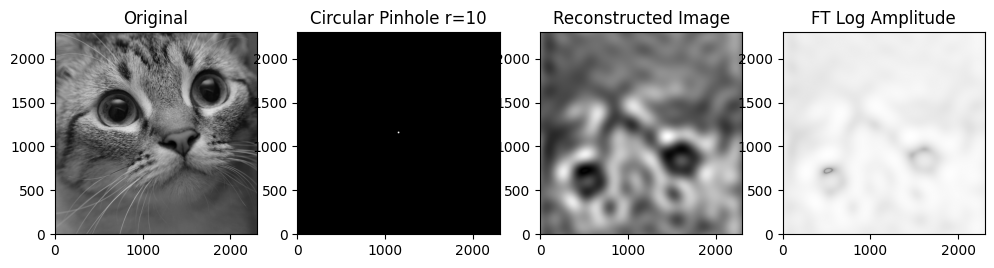

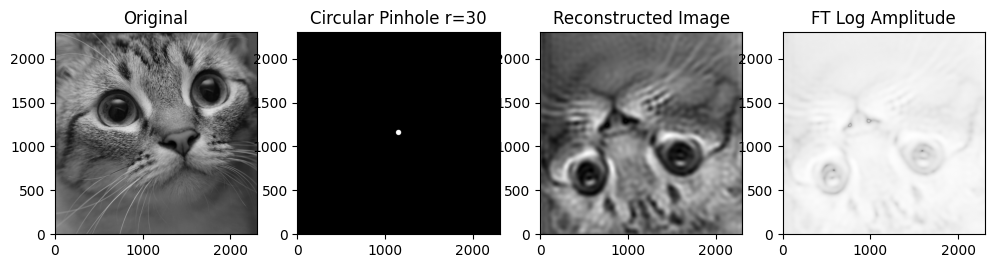

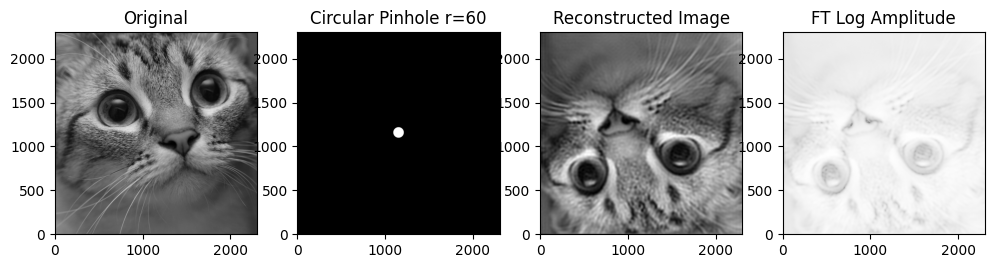

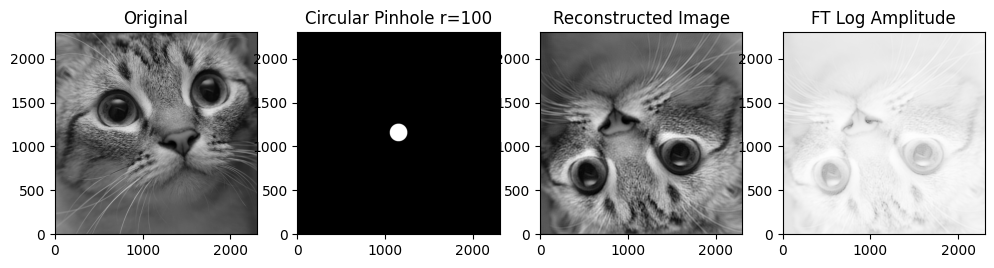

In [47]:
the_cat = np.load("the_cat.npy")
the_cat = np.flipud(the_cat)

for r in [10, 30, 60, 100]:
    circular_pinhole(the_cat, r)

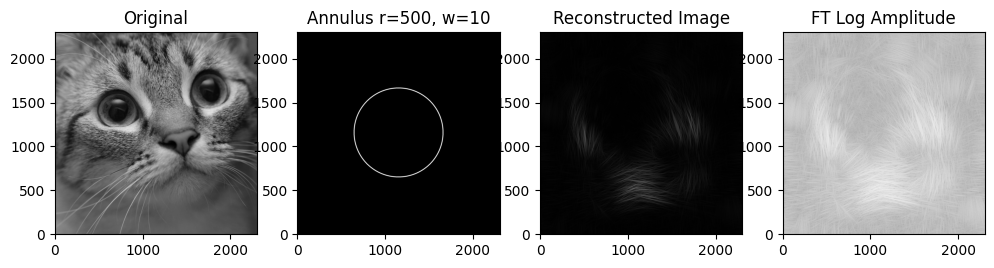

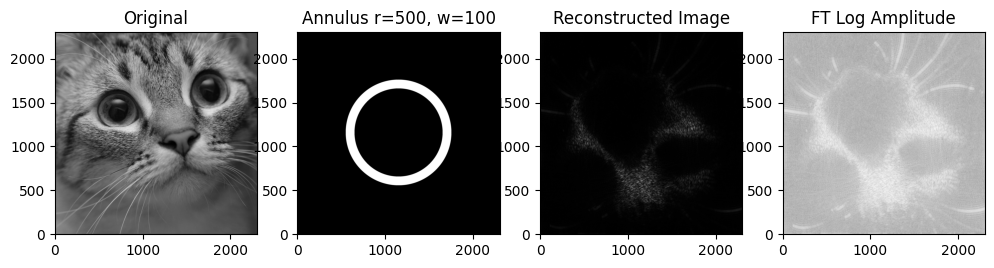

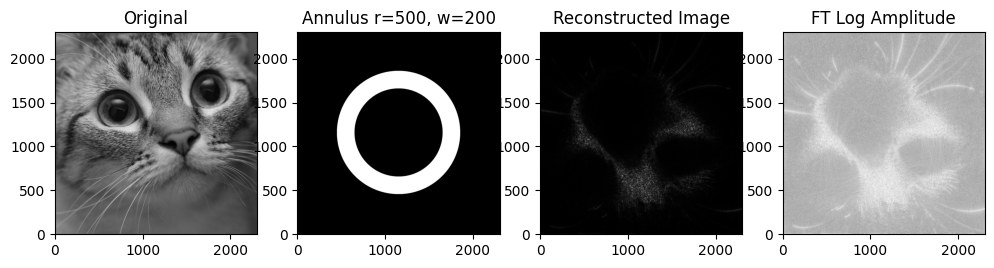

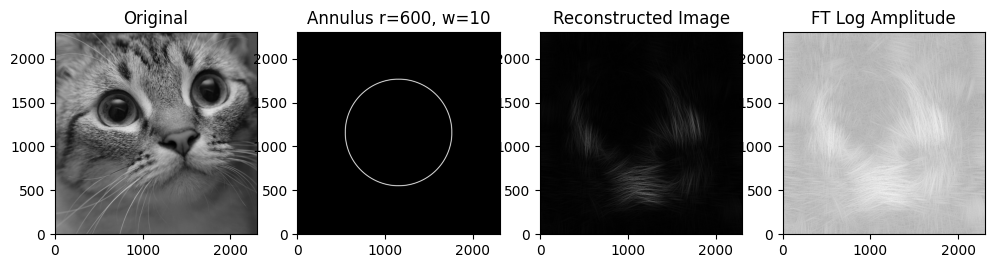

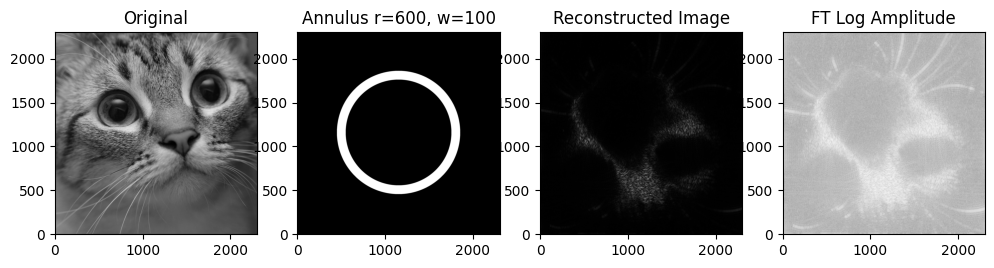

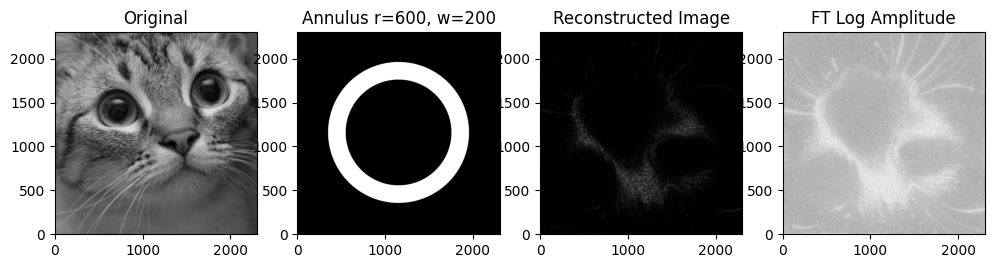

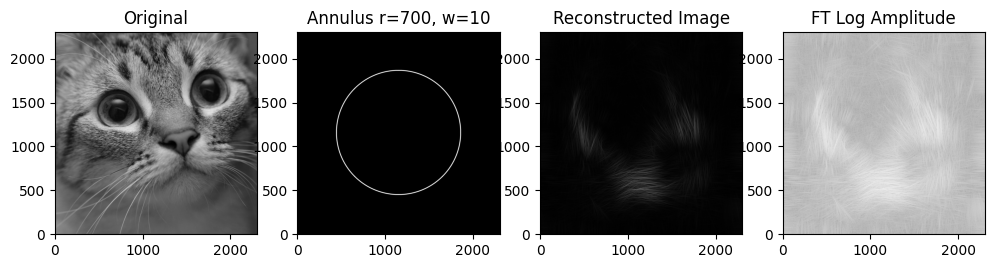

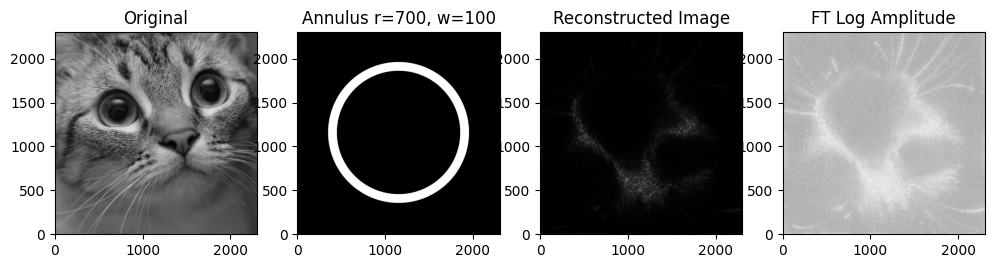

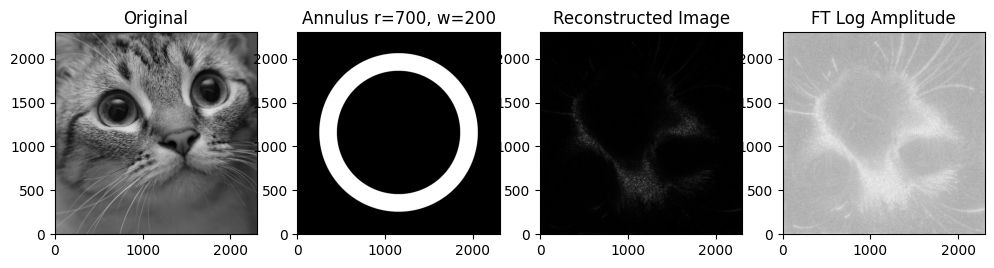

In [55]:
inner_radii = [500, 600, 700]
widths = [10,100, 200]

for r in inner_radii:
    for w in widths:
        annular_aperture(the_cat, inner_radius=r, width=w)